# Exploração Inicial e Processamento dos dados 



# Importação das bibliotecas


In [1]:
import numpy as np              # Numerical computing
import pandas as pd             # DataFrames and data analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data visualization
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Statistical plots

# Carregamento dos dados


In [2]:
df = pd.read_csv(r'..\data\raw\credit_score_data.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8928\359614134.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'..\data\raw\credit_score_data.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Análise inicial do dados
Tamanho do data set, informações, nulos e duplicados 


In [3]:
df.shape


(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
df.isnull().sum()  

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df.duplicated().sum()  

np.int64(0)

# Pré Processamento 


## Criação de cópia do DataFrame original

In [9]:
# Criando uma cópia do DataFrame original para preservar os dados brutos
df_processado = df.copy()


## Renomeando as colunas para o português
Este passo ajusta os nomes das colunas do DataFrame df_processado para facilitar a leitura e interpretação em português. A renomeação segue uma padronização em snake_case, mantendo a clareza dos significados de cada campo.




In [10]:
df_processado.rename(columns={
    'ID': 'id',
    'Customer_ID': 'id_cliente',
    'Month': 'mes',
    'Name': 'nome',
    'Age': 'idade',
    'SSN': 'ssn',
    'Occupation': 'ocupacao',
    'Annual_Income': 'renda_anual',
    'Monthly_Inhand_Salary': 'salario_liquido_mensal',
    'Num_Bank_Accounts': 'qtd_contas_bancarias',
    'Num_Credit_Card': 'qtd_cartoes_credito',
    'Interest_Rate': 'taxa_juros',
    'Num_of_Loan': 'qtd_emprestimos',
    'Type_of_Loan': 'tipos_emprestimos',
    'Delay_from_due_date': 'dias_atraso_pagamento',
    'Num_of_Delayed_Payment': 'qtd_pagamentos_atrasados',
    'Changed_Credit_Limit': 'variacao_limite_credito',
    'Num_Credit_Inquiries': 'qtd_consultas_credito',
    'Credit_Mix': 'mix_credito',
    'Outstanding_Debt': 'divida_pendente',
    'Credit_Utilization_Ratio': 'percentual_utilizacao_credito',
    'Credit_History_Age': 'tempo_historico_credito',
    'Payment_of_Min_Amount': 'pagamento_valor_minimo',
    'Total_EMI_per_month': 'total_emprestimos_mensal',
    'Amount_invested_monthly': 'valor_investido_mensal',
    'Payment_Behaviour': 'comportamento_pagamento',
    'Monthly_Balance': 'saldo_mensal',
    'Credit_Score': 'score_credito'
}, inplace=True)


In [11]:
df_processado.columns

Index(['id', 'id_cliente', 'mes', 'nome', 'idade', 'ssn', 'ocupacao',
       'renda_anual', 'salario_liquido_mensal', 'qtd_contas_bancarias',
       'qtd_cartoes_credito', 'taxa_juros', 'qtd_emprestimos',
       'tipos_emprestimos', 'dias_atraso_pagamento',
       'qtd_pagamentos_atrasados', 'variacao_limite_credito',
       'qtd_consultas_credito', 'mix_credito', 'divida_pendente',
       'percentual_utilizacao_credito', 'tempo_historico_credito',
       'pagamento_valor_minimo', 'total_emprestimos_mensal',
       'valor_investido_mensal', 'comportamento_pagamento', 'saldo_mensal',
       'score_credito'],
      dtype='object')

Dicionário de dados – Colunas do DataFrame df_processado
| Coluna                          | Descrição                                                                                 |
| ------------------------------- | ----------------------------------------------------------------------------------------- |
| `id`                            | Identificador único da linha no dataset.                                                  |
| `id_cliente`                    | Identificador único de cada cliente (pode se repetir ao longo dos meses).                 |
| `mes`                           | Mês de referência do registro (ex.: Janeiro, Fevereiro).                                  |
| `nome`                          | Nome do cliente (pode ser considerado irrelevante para análise preditiva).                |
| `idade`                         | Idade do cliente. Pode conter valores inválidos (ex.: negativos ou acima de 1000).        |
| `ssn`                           | Número de seguro social mascarado (pode conter dados corrompidos).                        |
| `ocupacao`                      | Profissão ou ocupação atual do cliente.                                                   |
| `renda_anual`                   | Renda anual bruta declarada pelo cliente.                                                 |
| `salario_liquido_mensal`        | Salário líquido recebido mensalmente (renda disponível).                                  |
| `qtd_contas_bancarias`          | Quantidade de contas bancárias que o cliente possui.                                      |
| `qtd_cartoes_credito`           | Número de cartões de crédito ativos do cliente.                                           |
| `taxa_juros`                    | Taxa de juros média aplicada aos cartões de crédito do cliente.                           |
| `qtd_emprestimos`               | Quantidade de empréstimos que o cliente possui.                                           |
| `tipos_emprestimos`             | Lista dos tipos de empréstimos contratados (ex.: Pessoal, Automóvel, Estudantil).         |
| `dias_atraso_pagamento`         | Tempo médio (em dias) de atraso nos pagamentos do cliente.                                |
| `qtd_pagamentos_atrasados`      | Número total de pagamentos feitos com atraso.                                             |
| `variacao_limite_credito`       | Variação percentual no limite do cartão de crédito ao longo do tempo.                     |
| `qtd_consultas_credito`         | Número de consultas ao histórico de crédito do cliente.                                   |
| `mix_credito`                   | Composição do portfólio de crédito do cliente (ex.: bom, padrão, ruim).                   |
| `divida_pendente`               | Valor total de dívida ainda não paga pelo cliente.                                        |
| `percentual_utilizacao_credito` | Percentual do crédito disponível que está sendo utilizado.                                |
| `tempo_historico_credito`       | Tempo de histórico de crédito em formato textual (ex.: "15 Years and 3 Months").          |
| `pagamento_valor_minimo`        | Indica se o cliente costuma pagar apenas o valor mínimo das faturas (Yes/No).             |
| `total_emprestimos_mensal`      | Soma das parcelas mensais pagas por empréstimos ativos (EMI).                             |
| `valor_investido_mensal`        | Valor mensal que o cliente declara investir.                                              |
| `comportamento_pagamento`       | Padrão de comportamento de pagamentos do cliente (ex.: pagamentos pequenos e frequentes). |
| `saldo_mensal`                  | Saldo médio mensal restante após gastos e pagamentos.                                     |
| `score_credito`                 | Score de crédito do cliente classificado em categorias: Poor, Standard ou Good.           |


## Exclusão de colunas identificadoras irrelevantes para modelagem
Nesta etapa, removemos do DataFrame as colunas que contêm dados sensíveis ou que funcionam apenas como identificadores, não contribuindo para a previsão do score de crédito. São elas: id, id_cliente, nome e ssn.

In [12]:
df_processado.drop(columns=['id', 'id_cliente', 'nome', 'ssn'], inplace=True)

In [13]:
df_processado.columns

Index(['mes', 'idade', 'ocupacao', 'renda_anual', 'salario_liquido_mensal',
       'qtd_contas_bancarias', 'qtd_cartoes_credito', 'taxa_juros',
       'qtd_emprestimos', 'tipos_emprestimos', 'dias_atraso_pagamento',
       'qtd_pagamentos_atrasados', 'variacao_limite_credito',
       'qtd_consultas_credito', 'mix_credito', 'divida_pendente',
       'percentual_utilizacao_credito', 'tempo_historico_credito',
       'pagamento_valor_minimo', 'total_emprestimos_mensal',
       'valor_investido_mensal', 'comportamento_pagamento', 'saldo_mensal',
       'score_credito'],
      dtype='object')

# Tratando valores nulos

Nesta etapa, analisamos a quantidade de valores nulos por coluna no DataFrame df_processado, exibindo apenas aquelas que possuem pelo menos um valor ausente. Isso nos ajuda a planejar o tratamento adequado para cada caso.

In [14]:
# Exibindo colunas com pelo menos um valor nulo
df_processado.isnull().sum()[df_processado.isnull().sum() > 0]


salario_liquido_mensal      15002
tipos_emprestimos           11408
qtd_pagamentos_atrasados     7002
qtd_consultas_credito        1965
tempo_historico_credito      9030
valor_investido_mensal       4479
saldo_mensal                 1200
dtype: int64

In [15]:
# Exibindo apenas colunas com valores nulos e suas respectivas porcentagens
(df_processado.isnull().sum() / len(df_processado) * 100).loc[lambda x: x > 0].sort_values(ascending=False)



salario_liquido_mensal      15.002
tipos_emprestimos           11.408
tempo_historico_credito      9.030
qtd_pagamentos_atrasados     7.002
valor_investido_mensal       4.479
qtd_consultas_credito        1.965
saldo_mensal                 1.200
dtype: float64

**Conclusão inicial:**  
As colunas `salario_liquido_mensal`, `tipos_emprestimos`, `tempo_historico_credito`, `qtd_pagamentos_atrasados`, `valor_investido_mensal`, `qtd_consultas_credito` e `saldo_mensal` apresentam valores ausentes acima de 1%, sendo recomendável analisá-las individualmente para definição da melhor estratégia de imputação ou tratamento.


## Salário liquido mensal 

In [16]:
df_processado.salario_liquido_mensal.unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333], shape=(13236,))

Antes de definir a melhor estratégia de imputação, visualizamos a distribuição da variável salario_liquido_mensal com um boxplot. Isso nos ajuda a entender presença de assimetria, outliers e dispersão.

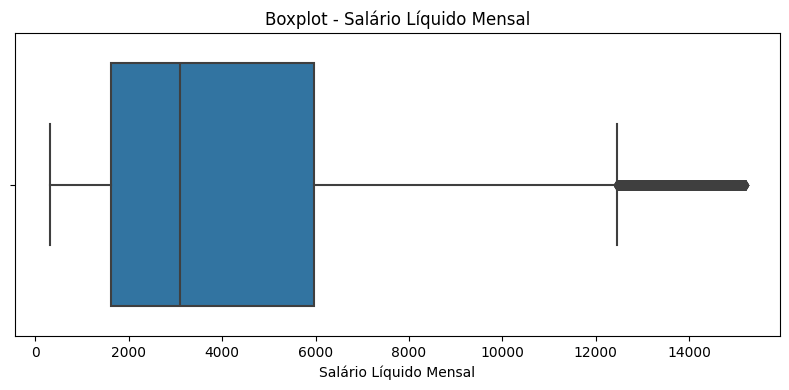

In [17]:
# Boxplot para analisar a distribuição do salário líquido mensal
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado['salario_liquido_mensal'])
plt.title('Boxplot - Salário Líquido Mensal')
plt.xlabel('Salário Líquido Mensal')
plt.tight_layout()
plt.show()


**Estratégia de imputação com KMeans baseada em perfis financeiros**
Vamos utilizar o algoritmo KMeans para agrupar clientes com perfis semelhantes, e imputar os valores ausentes da coluna salario_liquido_mensal com base na média dos clusters. Para isso, selecionamos variáveis possivelmente relacionadas ao salário líquido :

renda_anual

idade

qtd_cartoes_credito

total_emprestimos_mensal

variacao_limite_credito

divida_pendente

Antes de aplicar o KMeans, é fundamental garantir que os dados estejam limpos, consistentes e sem distorções que prejudiquem o algoritmo. Isso significa verificar se todas as variáveis numéricas estão corretamente tipadas, padronizar formatos e tratar outliers que possam influenciar a formação dos clusters. Valores extremos podem deslocar os centróides e comprometer tanto o agrupamento quanto a imputação dos salários líquidos.

Como essas mesmas variáveis também serão utilizadas no modelo final de previsão do score de crédito, já vamos adiantar esse processo de tratamento, garantindo que a base esteja organizada, sem inconsistências e pronta para servir tanto ao KMeans quanto às próximas etapas do pipeline de modelagem.


In [18]:
# Selecionando colunas para formar os perfis de clientes
variaveis_cluster = [
    'renda_anual',
    'idade',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

In [19]:
df_processado[variaveis_cluster].head()


,renda_anual,idade,qtd_cartoes_credito,total_emprestimos_mensal,variacao_limite_credito,divida_pendente
0,19114.12,23,4,49.574949,11.27,809.98
1,19114.12,23,4,49.574949,11.27,809.98
2,19114.12,-500,4,49.574949,_,809.98
3,19114.12,23,4,49.574949,6.27,809.98
4,19114.12,23,4,49.574949,11.27,809.98


In [20]:
df_processado[variaveis_cluster].dtypes

renda_anual                  object
idade                        object
qtd_cartoes_credito           int64
total_emprestimos_mensal    float64
variacao_limite_credito      object
divida_pendente              object
dtype: object

In [21]:
# Exibindo valores únicos não numéricos para cada coluna do tipo object usada no KMeans
for col in ['renda_anual', 'idade', 'variacao_limite_credito', 'divida_pendente']:
    print(f"\n--- Valores inválidos detectados em: {col} ---")
    print(df_processado[col].unique()[:30])  # Mostra apenas os 30 primeiros valores únicos



--- Valores inválidos detectados em: renda_anual ---
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16' '54392.16_' '8701.545' '8701.545_' '25546.26'
 '25546.26_' '31993.78' '92047.08' '92047.08_' '32284.62' '97791.42']

--- Valores inválidos detectados em: idade ---
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46']

--- Valores inválidos detectados em: variacao_limite_credito ---
['11.27' '_' '6.27' '9.27' '5.42' '7.42' '6.42' '7.1' '11.1' '9.1' '1.99'
 '-2.01' '-1.01' '-3.01' '2.58' '10.14' '9.14' '9.34' '15.34' '8.34'
 '11.34' '17.13' '21.13' '18.13' '8.24' '11.24' '5.76'
 '-1.2400000000000002' '1.7599999999999998' '11.0']

--- Valores inválidos detectados em: divida_pendente ---
['809.98'

### Renda Anual

Limpando e convertendo a coluna renda_anual para tipo numérico

In [22]:
# Passo 1: Remover underscores
df_processado['renda_anual'] = df_processado['renda_anual'].str.replace('_', '', regex=False)

# Passo 2: Conferir se restaram caracteres não numéricos
invalidos_renda_anual = df_processado[
    ~df_processado['renda_anual'].str.replace('.', '', regex=False).str.isnumeric()
]['renda_anual'].unique()

print("Valores ainda inválidos em renda_anual:", invalidos_renda_anual)

# Passo 3: Se não houver valores inválidos, converter para float
if len(invalidos_renda_anual) == 0:
    df_processado['renda_anual'] = df_processado['renda_anual'].astype(float)

# Passo 4: Conferir tipo final
print("Tipo final de renda_anual:", df_processado['renda_anual'].dtype)


Valores ainda inválidos em renda_anual: []
Tipo final de renda_anual: float64


Visualizamos a distribuição da variável renda_anual para identificar a presença de outliers e avaliar sua magnitude.

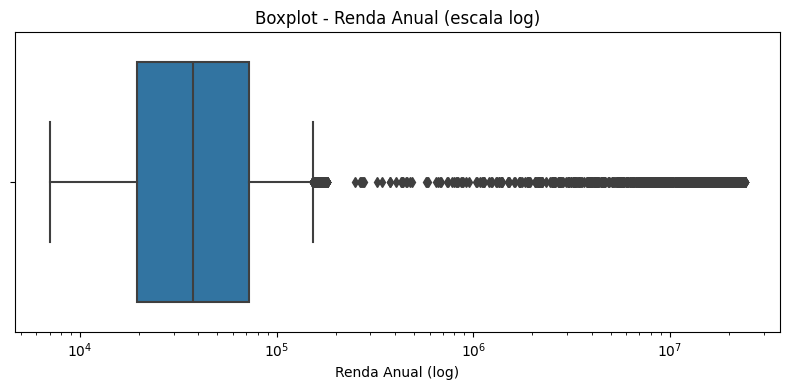

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado['renda_anual'])
plt.xscale('log')  # aplica escala logarítmica no eixo X
plt.title('Boxplot - Renda Anual (escala log)')
plt.xlabel('Renda Anual (log)')
plt.tight_layout()
plt.show()


In [24]:
# Exibindo estatísticas descritivas de renda_anual sem notação científica
pd.set_option('display.float_format', '{:,.2f}'.format)
df_processado['renda_anual'].describe()


count      100,000.00
mean       176,415.70
std      1,429,618.05
min          7,005.93
25%         19,457.50
50%         37,578.61
75%         72,790.92
max     24,198,062.00
Name: renda_anual, dtype: float64

Conclusão sobre a variável renda_anual:
Apesar de apresentar uma quantidade significativa de valores que podem ser considerados outliers pelo critério estatístico, esses valores refletem a realidade de rendas muito variadas dentro do conjunto de clientes. Não foram identificados registros absurdos ou inconsistentes, apenas clientes com rendas extremamente altas em relação à média. Portanto, não será realizada a remoção nem o ajuste desses valores.

### Idade


Limpando e convertendo a coluna idade para tipo numérico

In [25]:
# Passo 1: Remover underscores
df_processado['idade'] = df_processado['idade'].str.replace('_', '', regex=False)

# Passo 2: Conferir se ainda há valores não numéricos
invalidos_idade = df_processado[
    ~df_processado['idade'].str.replace('-', '', regex=False).str.isnumeric()
]['idade'].unique()

print("Valores ainda inválidos em idade:", invalidos_idade)

# Passo 3: Converter para inteiro se não houver valores inválidos
if len(invalidos_idade) == 0:
    df_processado['idade'] = df_processado['idade'].astype(int)

# Passo 4: Conferir tipo final
print("Tipo final de idade:", df_processado['idade'].dtype)


Valores ainda inválidos em idade: []
Tipo final de idade: int64


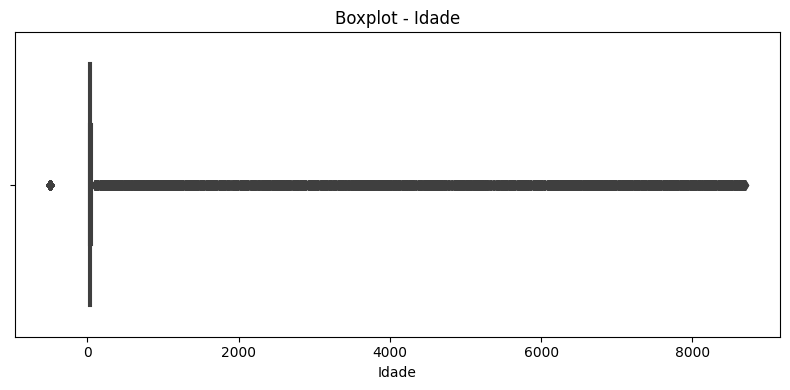

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_processado['idade'])
plt.title('Boxplot - Idade')
plt.xlabel('Idade')
plt.tight_layout()
plt.show()

In [27]:
pd.set_option('display.float_format', '{:,.0f}'.format)
print(df_processado['idade'].describe())


count   100,000
mean        111
std         686
min        -500
25%          24
50%          33
75%          42
max       8,698
Name: idade, dtype: float64


In [28]:
total_linhas = len(df_processado)

abaixo_18 = (df_processado['idade'] < 18).sum()
acima_100 = (df_processado['idade'] > 100).sum()

print(f"Percentual abaixo de 18 anos: {(abaixo_18 / total_linhas) * 100:.2f}%")
print(f"Percentual acima de 100 anos: {(acima_100 / total_linhas) * 100:.2f}%")


Percentual abaixo de 18 anos: 6.59%
Percentual acima de 100 anos: 1.89%


Idades abaixo de 18 e acima de 100 são tratadas como inválidas. Vamos substituí-las por NaN para que sejam imputadas posteriormente pelo modelo de KMeans.

In [29]:
# Substituindo idades inválidas (<18 e >100) por NaN
df_processado.loc[(df_processado['idade'] < 18) | (df_processado['idade'] > 100), 'idade'] = np.nan

# Conferindo resultado
print(df_processado['idade'].isna().sum(), "valores nulos em idade após substituição.")

8482 valores nulos em idade após substituição.


### Variação limite de crédito

Limpando e convertendo variacao_limite_credito para float usando 99999 como placeholder

In [30]:
# Passo 1: Remover underscores e substituir por placeholder 99999
df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].str.replace('_', '99999', regex=False)

# Passo 2: Verificar se restam valores inválidos
invalidos_limite = df_processado[
    ~df_processado['variacao_limite_credito'].str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.isnumeric()
]['variacao_limite_credito'].unique()

print("Valores ainda inválidos em variacao_limite_credito:", invalidos_limite)

# Passo 3: Converter para float somente se não restarem inválidos
if len(invalidos_limite) == 0:
    df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].astype(float)
    
    # Passo 4: Arredondar para 2 casas decimais
    df_processado['variacao_limite_credito'] = df_processado['variacao_limite_credito'].round(2)

# Conferindo tipo final
print("Tipo final:", df_processado['variacao_limite_credito'].dtype)


Valores ainda inválidos em variacao_limite_credito: []
Tipo final: float64


In [31]:
total = len(df_processado)
placeholder_99999 = (df_processado['variacao_limite_credito'] == 99999).sum()

porcentagem = (placeholder_99999 / total) * 100

print(f"Total de registros com 99999: {placeholder_99999}")
print(f"Percentual em relação ao total: {porcentagem:.2f}%")

Total de registros com 99999: 2091
Percentual em relação ao total: 2.09%


Boxplot para variacao_limite_credito (removendo o placeholder 99999)

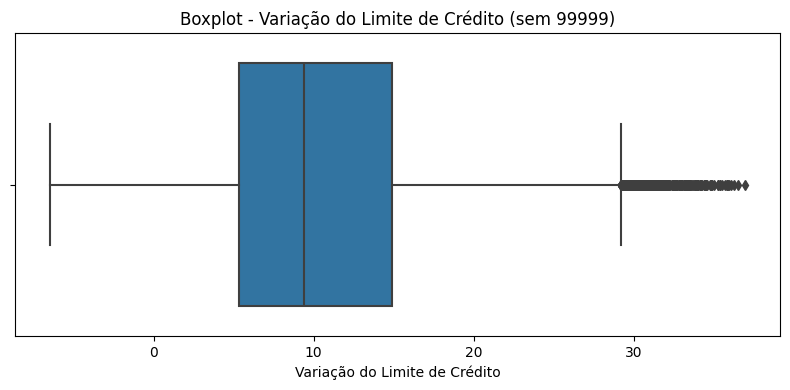

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_processado[df_processado['variacao_limite_credito'] != 99999]['variacao_limite_credito'])
plt.title('Boxplot - Variação do Limite de Crédito (sem 99999)')
plt.xlabel('Variação do Limite de Crédito')
plt.tight_layout()
plt.show()


Apenas 2,09% dos registros tinham underscore e foram tratados com o placeholder 99999. Após analisar o boxplot (sem esses placeholders), observou-se que não há grande concentração de outliers extremos — os valores variam de forma plausível para uma variável de limite de crédito.

Portanto, a melhor abordagem será imputar os valores de 99999 pela mediana da variável, garantindo que a distribuição original não seja distorcida e evitando a influência de possíveis valores extremos.

In [33]:
# Calculando a mediana sem considerar o placeholder 99999
mediana_limite = df_processado.loc[df_processado['variacao_limite_credito'] != 99999, 'variacao_limite_credito'].median()

# Substituindo 99999 pela mediana
df_processado.loc[df_processado['variacao_limite_credito'] == 99999, 'variacao_limite_credito'] = mediana_limite

# Conferindo se ainda existem placeholders
placeholders_restantes = (df_processado['variacao_limite_credito'] == 99999).sum()
print(f"Placeholders restantes: {placeholders_restantes}")
print(f"Mediana usada na imputação: {mediana_limite}")
df_processado['variacao_limite_credito'].describe()

Placeholders restantes: 0
Mediana usada na imputação: 9.4


count   100,000
mean         10
std           7
min          -6
25%           5
50%           9
75%          15
max          37
Name: variacao_limite_credito, dtype: float64

### Divida pendente

Limpando e convertendo a coluna divida_pendente para tipo numérico


In [34]:
# Passo 1: Remover underscores
df_processado['divida_pendente'] = df_processado['divida_pendente'].str.replace('_', '', regex=False)

# Passo 2: Conferir se restaram valores inválidos
invalidos_divida = df_processado[
    ~df_processado['divida_pendente'].str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.isnumeric()
]['divida_pendente'].unique()

print("Valores ainda inválidos em divida_pendente:", invalidos_divida)

# Passo 3: Converter para float somente se não restarem inválidos
if len(invalidos_divida) == 0:
    df_processado['divida_pendente'] = df_processado['divida_pendente'].astype(float)
    df_processado['divida_pendente'] = df_processado['divida_pendente'].round(2)

# Conferindo tipo final
print("Tipo final de divida_pendente:", df_processado['divida_pendente'].dtype)


Valores ainda inválidos em divida_pendente: []
Tipo final de divida_pendente: float64


Estatísticas descritivas e boxplot para divida_pendente

count   100,000.00
mean      1,426.22
std       1,155.13
min           0.23
25%         566.07
50%       1,166.15
75%       1,945.96
max       4,998.07
Name: divida_pendente, dtype: float64


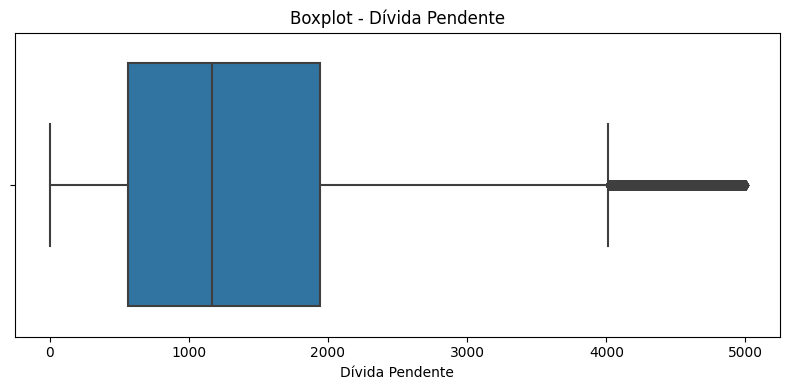

In [35]:
# Estatísticas descritivas
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_processado['divida_pendente'].describe())

# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df_processado['divida_pendente'])
plt.title('Boxplot - Dívida Pendente')
plt.xlabel('Dívida Pendente')
plt.tight_layout()
plt.show()


Os valores mínimos e máximos encontrados são aceitáveis para o contexto financeiro, mesmo com a presença de outliers identificados no boxplot. A faixa de variação ( 0,23 a 4.998,07) é coerente com diferentes perfis de clientes e seus níveis de endividamento. Assim, não haverá remoção ou ajuste desses valores, mantendo a integridade da distribuição original.



### Quantidade de Cartões e Total de emrestimso mensal 

       qtd_cartoes_credito  total_emprestimos_mensal
count           100,000.00                100,000.00
mean                 22.47                  1,403.12
std                 129.06                  8,306.04
min                   0.00                      0.00
25%                   4.00                     30.31
50%                   5.00                     69.25
75%                   7.00                    161.22
max               1,499.00                 82,331.00


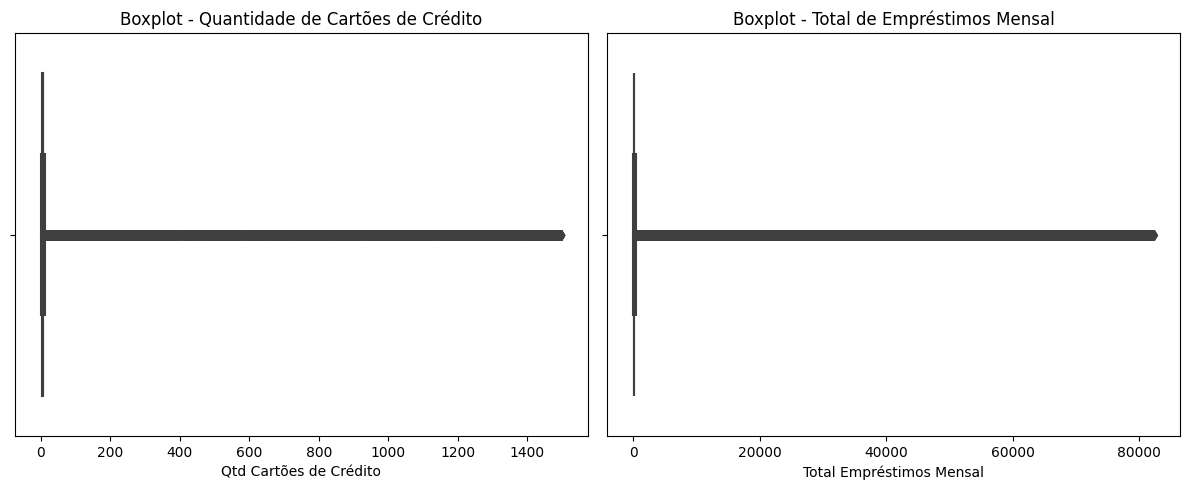

In [36]:
# Estatísticas descritivas
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_processado[['qtd_cartoes_credito', 'total_emprestimos_mensal']].describe())


plt.figure(figsize=(12,5))

# Boxplot para qtd_cartoes_credito
plt.subplot(1, 2, 1)
sns.boxplot(x=df_processado['qtd_cartoes_credito'])
plt.title('Boxplot - Quantidade de Cartões de Crédito')
plt.xlabel('Qtd Cartões de Crédito')

# Boxplot para total_emprestimos_mensal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_processado['total_emprestimos_mensal'])
plt.title('Boxplot - Total de Empréstimos Mensal')
plt.xlabel('Total Empréstimos Mensal')

plt.tight_layout()
plt.show()


Estratégia de tratamento para qtd_cartoes_credito e total_emprestimos_mensal
A análise descritiva mostrou comportamentos distintos entre as duas variáveis:

qtd_cartoes_credito:
A mediana é de 5 cartões, mas há registros com valores extremamente altos (até 1.499 cartões), o que é irrealista. Para preservar a integridade da base, adotaremos um limite superior (cap) de 20 cartões. Todos os registros acima desse valor serão imputados com a mediana (5), garantindo consistência sem distorcer a distribuição.

total_emprestimos_mensal:
Apesar de apresentar valores elevados (máximo de R$ 82.331,00), esses números são financeiramente plausíveis, já que clientes com alto volume de crédito podem ter parcelas altas. Portanto, não faremos ajustes nem imputações nessa variável.

In [37]:
# Calculando a mediana de qtd_cartoes_credito
mediana_cartoes = df_processado['qtd_cartoes_credito'].median()

# Aplicando o limite superior (cap) de 20 cartões
df_processado.loc[df_processado['qtd_cartoes_credito'] > 20, 'qtd_cartoes_credito'] = mediana_cartoes

# Conferindo se ainda existem valores acima de 20
print("Valores acima de 20 após imputação:", (df_processado['qtd_cartoes_credito'] > 20).sum())
print(f"Mediana usada na imputação: {mediana_cartoes}")


Valores acima de 20 após imputação: 0
Mediana usada na imputação: 5.0


## KMeans para imputar Idade e Salário Liquido Mensal


1️⃣ Treinar o KMeans sem usar idade (pois idade ainda tem muito NaN);
2️⃣ Imputar a idade dos clientes com base nos clusters formados;
3️⃣ Atualizar idade no dataset;
4️⃣ Treinar um novo KMeans agora incluindo idade;
5️⃣ Imputar salario_liquido_mensal com base nos clusters refinados.

Criando o DataFrame e padronizando os dados (sem idade)

In [47]:
# Variáveis sem idade
variaveis_sem_idade = [
    'renda_anual',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

# Criar DataFrame somente com essas variáveis
df_kmeans_idade = df_processado[variaveis_sem_idade + ['idade']].copy()

# Padronizar dados
scaler_idade = StandardScaler()
X_idade_scaled = scaler_idade.fit_transform(df_kmeans_idade[variaveis_sem_idade])

Determinando o número ideal de clusters (método do cotovelo – sem idade)

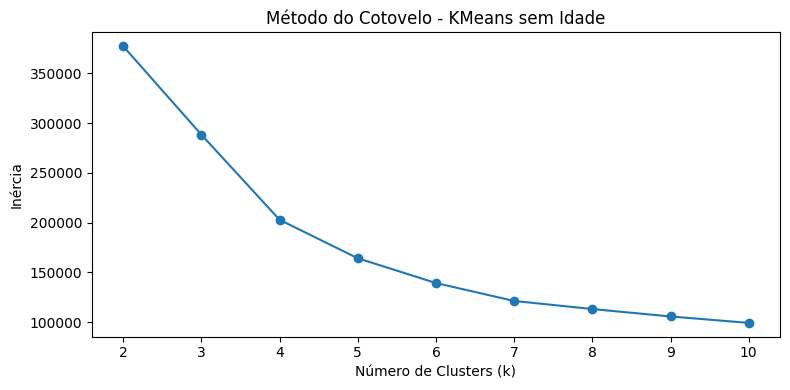

In [49]:
inercias = []
k_values = range(2, 11)  # vamos testar de 2 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_idade_scaled)
    inercias.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(k_values, inercias, marker='o')
plt.title('Método do Cotovelo - KMeans sem Idade')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.tight_layout()
plt.show()


Treinando o KMeans e atribuindo os clusters (sem idade)

In [50]:
# Treinar KMeans com 5 clusters
kmeans_idade = KMeans(n_clusters=5, random_state=42, n_init=10)

# Ajustar o modelo aos dados padronizados
df_kmeans_idade['cluster_idade'] = kmeans_idade.fit_predict(X_idade_scaled)

# Conferir a distribuição dos clusters
print(df_kmeans_idade['cluster_idade'].value_counts())


cluster_idade
0    45220
1    37205
3    14848
4     2038
2      689
Name: count, dtype: int64


Calculando a mediana de idade por cluster e imputando no DataFrame

In [51]:
# Criar cópia do DataFrame original para imputação
df_processado_kmeans1 = df_processado.copy()

# Calcular a mediana de idade para cada cluster
mediana_idade_cluster = df_kmeans_idade.groupby('cluster_idade')['idade'].median()

# Iterar sobre os clusters e imputar as idades faltantes com a mediana de cada cluster
for cluster in mediana_idade_cluster.index:
    idade_mediana = mediana_idade_cluster.loc[cluster]
    df_processado_kmeans1.loc[
        (df_processado_kmeans1['idade'].isna()) &
        (df_kmeans_idade['cluster_idade'] == cluster),
        'idade'
    ] = idade_mediana

# Conferindo se ainda existem idades nulas após a imputação
print("Idades nulas após imputação:", df_processado_kmeans1['idade'].isna().sum())


Idades nulas após imputação: 0


Criar DataFrame e padronizar (agora incluindo idade)

In [52]:
# Variáveis agora incluem idade
variaveis_com_idade = [
    'renda_anual',
    'idade',
    'qtd_cartoes_credito',
    'total_emprestimos_mensal',
    'variacao_limite_credito',
    'divida_pendente'
]

# Criar DataFrame para o novo KMeans
df_kmeans_salario = df_processado_kmeans1[variaveis_com_idade + ['salario_liquido_mensal']].copy()

# Padronizar dados
scaler_salario = StandardScaler()
X_salario_scaled = scaler_salario.fit_transform(df_kmeans_salario[variaveis_com_idade])

print("Shape dos dados padronizados (com idade):", X_salario_scaled.shape)


Shape dos dados padronizados (com idade): (100000, 6)


Treinando o KMeans com idade incluída (5 clusters)

In [53]:
# Treinar KMeans com 5 clusters usando as variáveis que agora incluem idade
kmeans_salario = KMeans(n_clusters=5, random_state=42, n_init=10)

# Ajustar o modelo e prever os clusters
df_kmeans_salario['cluster_salario'] = kmeans_salario.fit_predict(X_salario_scaled)

# Conferir a distribuição dos clusters
print(df_kmeans_salario['cluster_salario'].value_counts())

cluster_salario
2    43140
0    31360
1    22784
3     2027
4      689
Name: count, dtype: int64


Calculando a mediana do salário por cluster e imputando no DataFrame

In [54]:
# Criar cópia do DataFrame com idade já imputada
df_processado_kmeans2 = df_processado_kmeans1.copy()

# Calcular a mediana de salario_liquido_mensal para cada cluster
mediana_salario_cluster = df_kmeans_salario.groupby('cluster_salario')['salario_liquido_mensal'].median()

# Iterar sobre os clusters e imputar os salários faltantes com a mediana de cada cluster
for cluster in mediana_salario_cluster.index:
    salario_mediana = mediana_salario_cluster.loc[cluster]
    df_processado_kmeans2.loc[
        (df_processado_kmeans2['salario_liquido_mensal'].isna()) &
        (df_kmeans_salario['cluster_salario'] == cluster),
        'salario_liquido_mensal'
    ] = salario_mediana

# Conferindo se ainda existem salários nulos após a imputação
print("Salário líquido mensal nulo após imputação:", df_processado_kmeans2['salario_liquido_mensal'].isna().sum())


Salário líquido mensal nulo após imputação: 0


In [55]:
# Atualizando df_processado com os valores imputados de idade e salario_liquido_mensal
df_processado.update(df_processado_kmeans2[['idade', 'salario_liquido_mensal']])

# Conferindo se restaram valores nulos
print("Idades nulas no df_processado:", df_processado['idade'].isna().sum())
print("Salário líquido mensal nulo no df_processado:", df_processado['salario_liquido_mensal'].isna().sum())


Idades nulas no df_processado: 0
Salário líquido mensal nulo no df_processado: 0


## Tipos de Emprestimos 

In [59]:
print(df_processado['tipos_emprestimos'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [60]:
# Garantindo que todos os valores únicos de tipos_emprestimos sejam exibidos
for valor in df_processado['tipos_emprestimos'].unique():
    print(valor)


Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Credit-Builder Loan
Auto Loan, Auto Loan, and Not Specified
Not Specified
nan
Credit-Builder Loan, and Mortgage Loan
Not Specified, Auto Loan, and Student Loan
Personal Loan, Debt Consolidation Loan, and Auto Loan
Not Specified, and Payday Loan
Credit-Builder Loan, Personal Loan, and Auto Loan
Payday Loan, and Payday Loan
Not Specified, Student Loan, and Personal Loan
Personal Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, Student Loan, and Payday Loan
Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan
Payday Loan, and Home Equity Loan
Credit-Builder Loan, Not Specified, Mortgage Loan, Payday Loan, Credit-Builder Loan, and Personal Loan
Mortgage Loan, Debt Consolidation Loan, Payday Loan, Auto Loan, and Not Specified
Credit-Builder Loan, Mortgage Loan, Mortgage Loan, Credit-Builder Loan, and Student Loan
Not Specified, Student Loan, and Student Loan
Payday Loan, Not Specified, 

In [61]:
# Contando valores únicos
qtd_unicos = df_processado['tipos_emprestimos'].nunique()

print(f"Quantidade de valores únicos em tipos_emprestimos: {qtd_unicos}")


Quantidade de valores únicos em tipos_emprestimos: 6260
